In [19]:
import pandas as pd

In [20]:
data_ch_37 = pd.read_csv(r"C:\Users\stsax\OneDrive\Studium\9. Semester\Masterarbeit\pcap\CH_37_V1.csv", encoding="cp1252")
data_hopping = pd.read_csv(r"C:\Users\stsax\OneDrive\Studium\9. Semester\Masterarbeit\pcap\Hopping_V1.csv", encoding="cp1252")

In [21]:
data_ch_37['Time'] = pd.to_datetime(data_ch_37['Time'], unit='s')
data_hopping['Time'] = pd.to_datetime(data_hopping['Time'], unit='s')

In [22]:
min_time = max(data_ch_37['Time'].min(), data_hopping['Time'].min())
max_time = min(data_ch_37['Time'].max(), data_hopping['Time'].max())

In [23]:
data_ch_37 = data_ch_37[(data_ch_37['Time']>= min_time) & (data_ch_37['Time'] <= max_time)]
data_hopping = data_hopping[(data_hopping['Time']>= min_time) & (data_hopping['Time'] <= max_time)]

#filter to get same channel for both files
data_hopping = data_hopping[data_hopping['Channel'] == 37]

data_hopping = data_hopping[['Time']]
data_ch_37 = data_ch_37[['Time']]

data_ch_37['Time Delta'] = (data_ch_37['Time'] - data_ch_37['Time'].min()).dt.seconds
data_hopping['Time Delta'] = (data_hopping['Time'] - data_hopping['Time'].min()).dt.seconds


In [24]:
ch_37_packet_rate = data_ch_37.groupby('Time Delta').size().reset_index().rename(columns = {0: 'Packet Count'})
hopping_packet_rate = data_hopping.groupby('Time Delta').size().reset_index().rename(columns = {0: 'Packet Count'})

In [25]:
assert len(ch_37_packet_rate) == len(hopping_packet_rate)

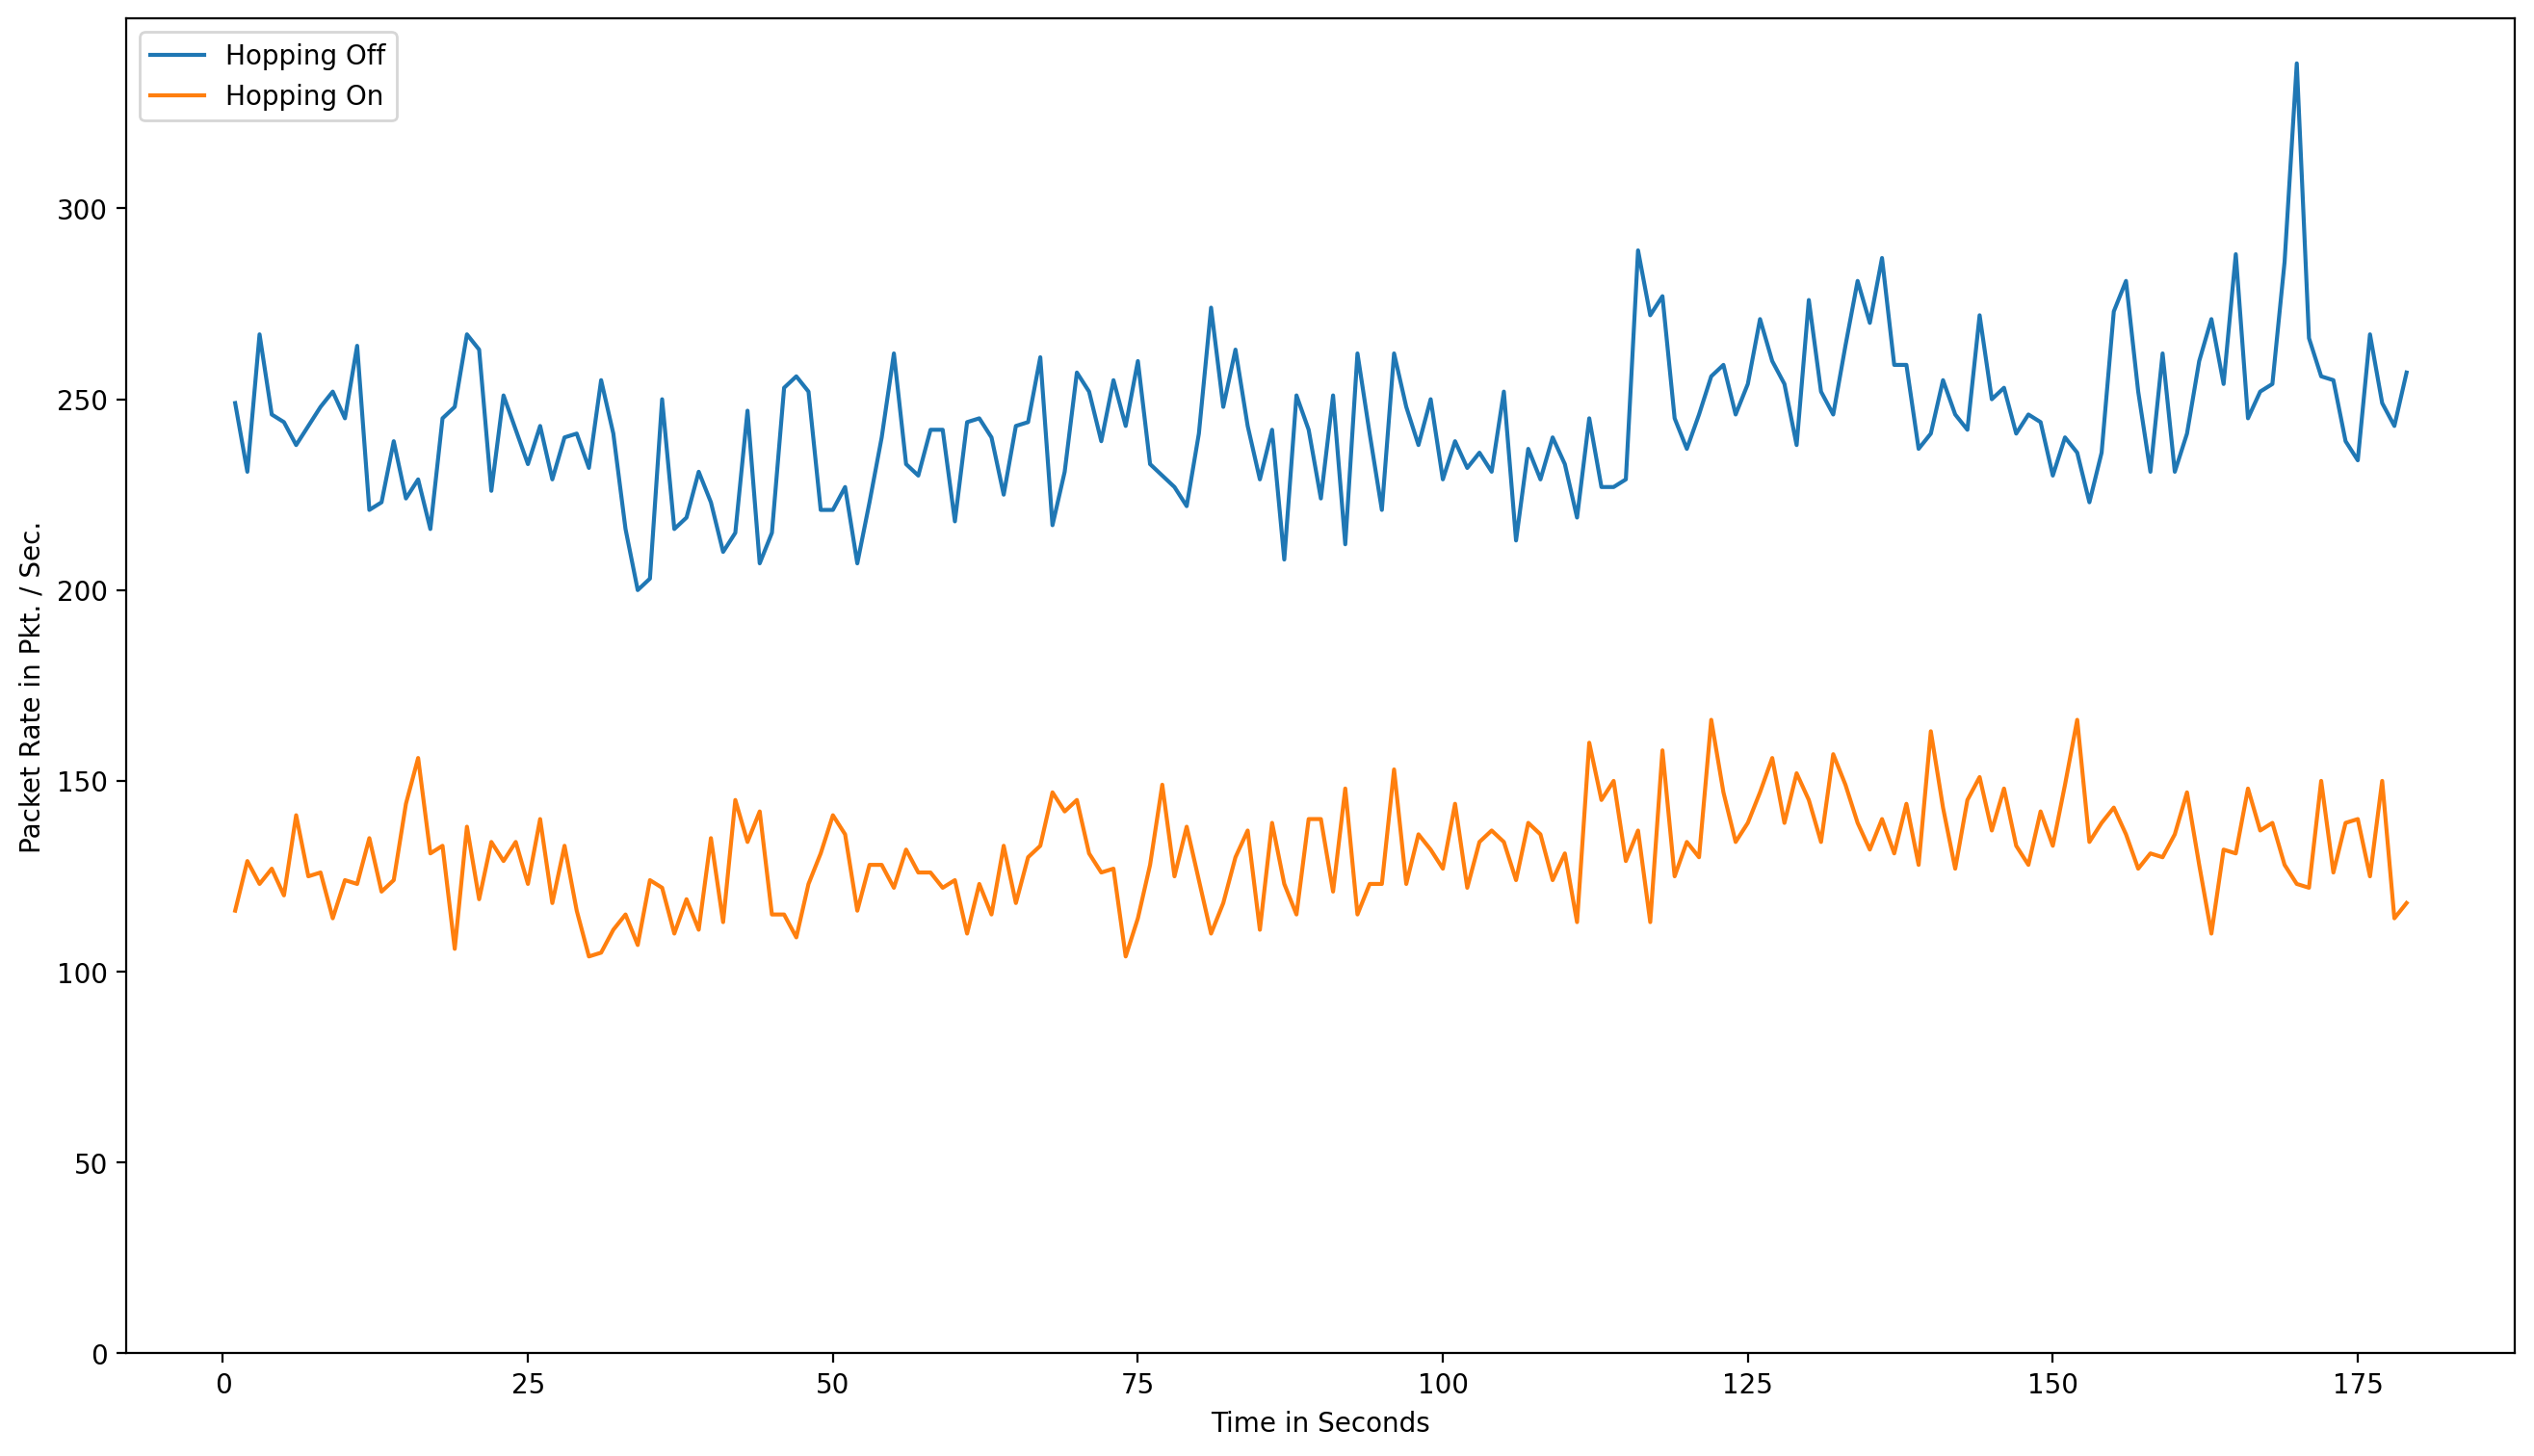

In [26]:
import matplotlib.pyplot as plt

plt.figure(dpi = 200, figsize=(16, 9))
plt.plot(ch_37_packet_rate['Time Delta'][1:-1], ch_37_packet_rate['Packet Count'][1:-1], label = 'Hopping Off')
plt.plot(hopping_packet_rate['Time Delta'][1:-1], hopping_packet_rate['Packet Count'][1:-1] , label = 'Hopping On')
plt.ylim(bottom = 0)
plt.legend()
plt.ylabel('Packet Rate in Pkt. / Sec.')
plt.xlabel('Time in Seconds')
plt.show()

In [27]:
import numpy as np

corr = np.corrcoef(ch_37_packet_rate['Packet Count'], hopping_packet_rate['Packet Count'])

In [28]:
corr

array([[1.        , 0.13441837],
       [0.13441837, 1.        ]])